# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction and data transformation. It aims to identify the directions (principal components) in which the data varies the most, and represents the data in a new coordinate system defined by these components.

The key idea behind PCA is to find a lower-dimensional representation of the data that captures the maximum amount of variance. It achieves this through an orthogonal projection of the original features into a smaller set of uncorrelated variables, called principal components. The first principal component is the direction that captures the most amount of variance in the data, followed by the second principal component, and so on. The principal components are linear combinations of the original features. 

Here's a step-by-step overview of how PCA works:
- **Standardize the data:** If the features have different scales or units, it is important to standardize the data by subtracting the mean and dividing by the standard deviation. This step ensures that all features are on a similar scale and prevents dominance by features with larger variances.

- **Compute the covariance matrix:** The covariance matrix is computed to understand the relationships and dependencies between the different features in the data.

- **Perform eigendecomposition:** The covariance matrix is decomposed into its eigenvectors and eigenvalues. The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each principal component.

- **Select a number of principal components:** The principal components are ranked based on their corresponding eigenvalues, and the top components capturing the most variance are selected. The number of principal components to retain depends on thedesired level of dimensionality reduction.

- **Project the data onto the coordinate system defined by the chosen components:** The original data is transformed by projecting it onto the selected principal components. Each data point is represented by its new coordinates in the principal component space.

PCA is a powerful tool for exploratory data analysis, visualization, and feature extraction. It helps to identify patterns, reduce noise, and provide a concise representation of the data. PCA is widely used in various fields, including image processing, signal processing, genetics, finance, and social sciences, where dimensionality reduction and data compression are necessary.

<img src="./images/projplane.gif" width="400"/>

### General procedure (by hand)

Let's start by coding the algorithm by hand. Later on, we'll use Sklearn's PCA and project your data into the two first principal components

1. Standardize the data
2. Calculate the covariance matrix
3. Calculate the eigenvalues and eigenvectors of the covariance matrix
4. Select the most significant components (~95%) or the first two in case you want to visualize the projection
5. Transform the data

For our first example, we'll generate 50 random data points close to the line $y=2x$. 

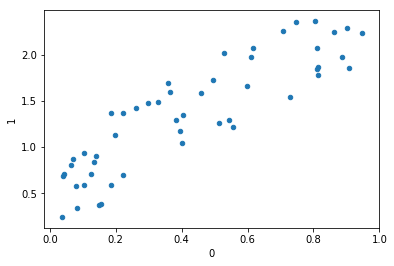

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x = np.random.rand(50)
y = 2*x + np.random.rand(50)
df = pd.DataFrame(np.array([x,y]).T)
df.plot.scatter(x=0,y=1)

The code below performs all the needed operations by hand. Can you interpret it? 

[ 0.08049023  0.06146803  1.43483327  0.82595893 -1.72324723  1.4943897
  1.78771062 -1.16956771 -0.20043595 -0.22909152 -1.93848639 -1.53362266
 -0.59058193  0.32510826 -0.34423197 -1.01887731 -0.9432649   1.31453505
  1.48599331  1.6804994   0.29133354  1.26824076 -2.08813933 -1.7596977
  2.0133611   1.26208528  0.18276241  1.21643484  0.57483157  0.16591535
  0.47933691 -1.29963633 -0.09509553 -1.49670351 -0.15318394 -1.83411393
  0.43134769  1.75052841 -1.74740039 -2.28415306  1.68556698 -0.76506829
 -2.24397372 -2.0870175  -0.12914932  1.81756985 -1.43365892  1.71836092
  2.24484037  1.51489628]


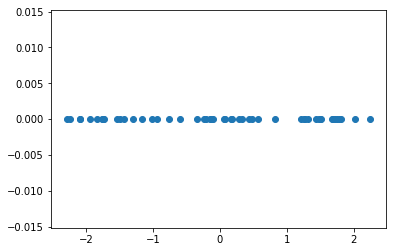

In [105]:
# Task 1: In each step, indicate what the code is doing. 
# Additionally, identify what each of the v1,..,v6 represent and write it in the comments

# Step 1:
v1 =(df-df.mean())/df.std()
#v1:

# Step 2:
v2 = np.cov(v1.T)
#v2: 

# Step 3:
v3, v4 = np.linalg.eig(v2)
#v3:
#v4:

# Step 4:
v5 = 1
#v5:

# Step 5:
v6 = np.dot(v1, v4[:,1:2]).flatten()
#v6:

# Final Plot
plt.scatter(v6, np.zeros_like(v6))
print(v6)

The transformation **T = X W** maps a data vector $x_{(i)}$ from an original space with p variables to a lower dimensional space. Nonetheless, we don't need to maintain all principal components. Select the two eigenvectors with the largest eigenvalues and do the follwing mapping: $\begin{gather*}
{\displaystyle \mathbf {T}=\mathbf {X} \mathbf {W}}
\end{gather*}
$

This process, can be automated using the `sklearn` package PCA. 

In [111]:
# Task 2: Write your comments here
# Modify the code below so that you obtain the same result as what you did by hand above: 

from sklearn.decomposition import PCA

n_components = 1
pca = PCA(n_components=n_components)

proj_sdata = pca.fit_transform(v1)

print(proj_sdata.flatten())

[-0.08049023 -0.06146803 -1.43483327 -0.82595893  1.72324723 -1.4943897
 -1.78771062  1.16956771  0.20043595  0.22909152  1.93848639  1.53362266
  0.59058193 -0.32510826  0.34423197  1.01887731  0.9432649  -1.31453505
 -1.48599331 -1.6804994  -0.29133354 -1.26824076  2.08813933  1.7596977
 -2.0133611  -1.26208528 -0.18276241 -1.21643484 -0.57483157 -0.16591535
 -0.47933691  1.29963633  0.09509553  1.49670351  0.15318394  1.83411393
 -0.43134769 -1.75052841  1.74740039  2.28415306 -1.68556698  0.76506829
  2.24397372  2.0870175   0.12914932 -1.81756985  1.43365892 -1.71836092
 -2.24484037 -1.51489628]


In [ ]:
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['c', 'm', 'y'])
scatter = plt.scatter(projected_data[:,0], projected_data[:,1], c=y, cmap=colormap)
plt.legend(handles = scatter.legend_elements()[0], labels=list(iris['target_names']))
plt.xlabel('PCA component 1', fontsize=14)
plt.ylabel('PCA component 2', fontsize=14)

In [ ]:
# Import the dataset
df = pd.read_csv("gene_expression.csv")

# Separate features and labels
X = df.drop("Label", axis=1)
y = df["Label"]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2")
plt.title("PCA on Gene Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# Explained variance from PCA
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:20], marker='o')
plt.title("Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [ ]:
# Alternative: t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="Set1")
plt.title("t-SNE on Gene Expression Data")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

In [ ]:
# Alternative: UMAP
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X)

# Visualize UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette="Set3")
plt.title("UMAP on Gene Expression Data")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

## Iris Classification
# 🌸 The Iris Dataset

The **Iris dataset** is a classic dataset used in statistics and machine learning. It contains measurements of iris flowers from three different species.

---

## 📦 Dataset Overview

- **Total samples**: 150
- **Classes**: 3 iris species
  - *Setosa*
  - *Versicolor*
  - *Virginica*
- **Features**: 4 numeric measurements (in cm)

| Feature             | Description                           |
|---------------------|---------------------------------------|
| `sepal length`      | Length of the sepal (outer part)      |
| `sepal width`       | Width of the sepal                    |
| `petal length`      | Length of the petal (inner part)      |
| `petal width`       | Width of the petal                    |

---

## 🧪 Example Sample

| Sepal Length | Sepal Width | Petal Length | Petal Width | Species     |
|--------------|-------------|--------------|-------------|-------------|
| 5.1          | 3.5         | 1.4          | 0.2         | Setosa      |

---

## 🧠 Common Uses

The Iris dataset is widely used to:

- Practice **classification** (e.g., logistic regression, decision trees, SVMs)
- Apply **dimensionality reduction** (e.g., PCA, t-SNE)
- Explore **clustering** (e.g., k-means)
- Visualize data in 2D and 3D
- Test basic machine learning workflows

---

## 📥 Loading the Dataset in Python

Using **scikit-learn**:
```python
from sklearn.datasets import load_iris

data = load_iris()
X = data.data       # shape: (150, 4)
y = data.target     # 0 = Setosa, 1 = Versicolor, 2 = Virginica


In [116]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
#Task 
#Create a vector X in which each element is a list of 4 features

#